In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold 

In [69]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [70]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [71]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [72]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

In [74]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
Y = df["Alcoolismo e Depressão"]

print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [75]:
test_size = 0.4 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

In [77]:
# Realize a validação cruzada com 5 dobras (k = 5)
scores = cross_val_score(rf, X, Y, cv=5)

# Calcule a média e o desvio padrão das pontuações
mean_score = scores.mean()
std_score = scores.std()

print("Média das pontuações:", mean_score)
print("Desvio padrão das pontuações:", std_score)

Média das pontuações: 0.9987616099071207
Desvio padrão das pontuações: 0.0015167119150360413


In [78]:
# Calcular a acurácia
accuracy = accuracy_score(Y_test, predictions)
print("Acurácia:", accuracy)

# Calcular a precisão
precision = precision_score(Y_test, predictions)
print("Precisão:", precision)

# Calcular o recall
recall = recall_score(Y_test, predictions)
print("Recall:", recall)

# Calcular o F1-score
f1 = f1_score(Y_test, predictions)
print("F1-Score:", f1)

# Calcular a matriz de confusão
confusion = confusion_matrix(Y_test, predictions)
print("Matriz de Confusão:")
print(confusion)

Acurácia: 0.9969040247678018
Precisão: 0.9939759036144579
Recall: 1.0
F1-Score: 0.9969788519637462
Matriz de Confusão:
[[314   2]
 [  0 330]]


Text(0.5, 1.0, 'Matriz de Confusão')

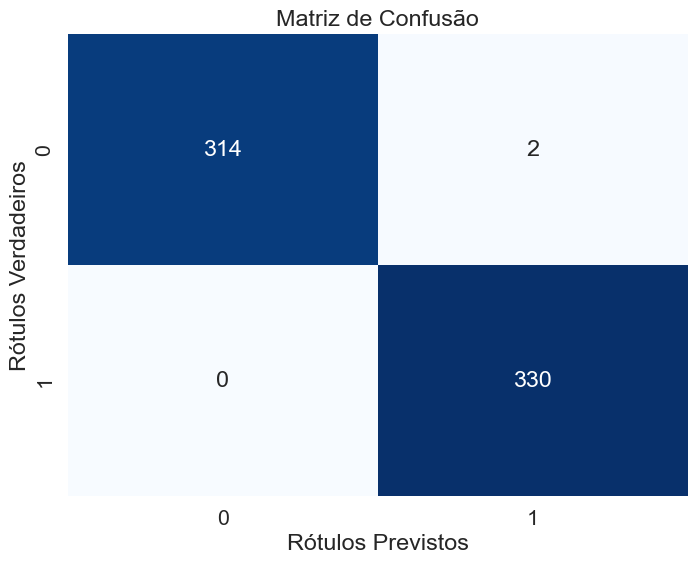

In [79]:
# Calcule a matriz de confusão
cm = confusion_matrix(Y_test, predictions)

# Crie uma figura e um eixo para o plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte

# Use o seaborn para criar um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configuração de rótulos e títulos
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

In [80]:
report = classification_report(Y_test, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.00,0.99,1.0,316.0
1.0,0.99,1.00,1.0,330.0
accuracy,1.00,1.00,1.0,1.0
macro avg,1.00,1.00,1.0,646.0
weighted avg,1.00,1.00,1.0,646.0


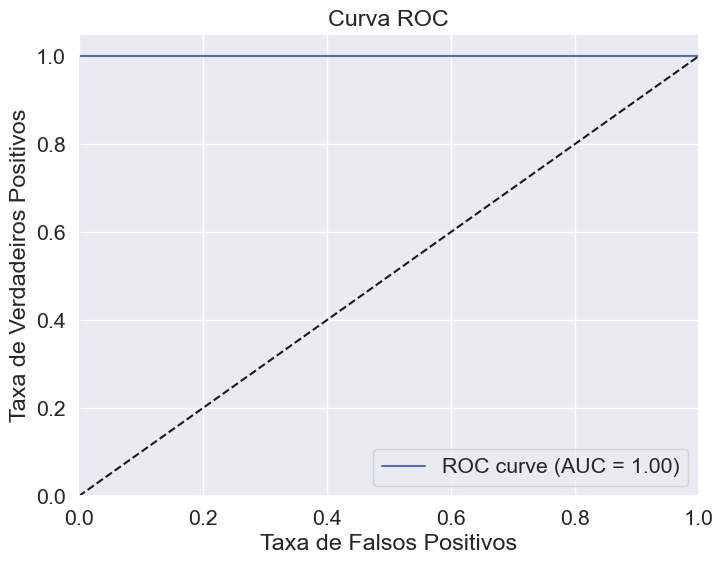

In [81]:
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

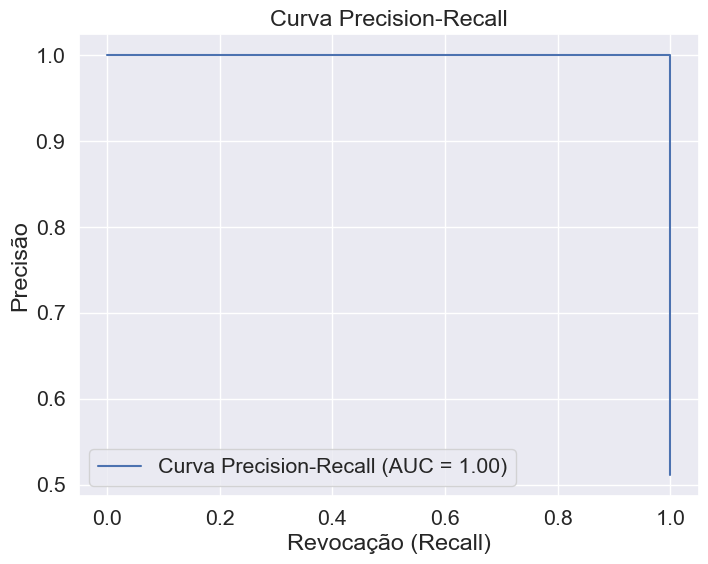

In [82]:
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()